## 00 packages

In [1]:
##########################################################################################
##########################################################################################

import networkx as nx

from shapely.geometry import Point,Polygon

import math

import random

##########################################################################################
##########################################################################################

import numpy as np

import pandas as pd

##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

from itertools import combinations, permutations

from itertools import islice

##########################################################################################
##########################################################################################

import copy


### 01 parameters

In [2]:
##########################################################################################
##########################################################################################

alpha=1

batch_interval=1

##########################################################################################
##########################################################################################

speed=10000/60

### 01 Comparision of the latest compeletion time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

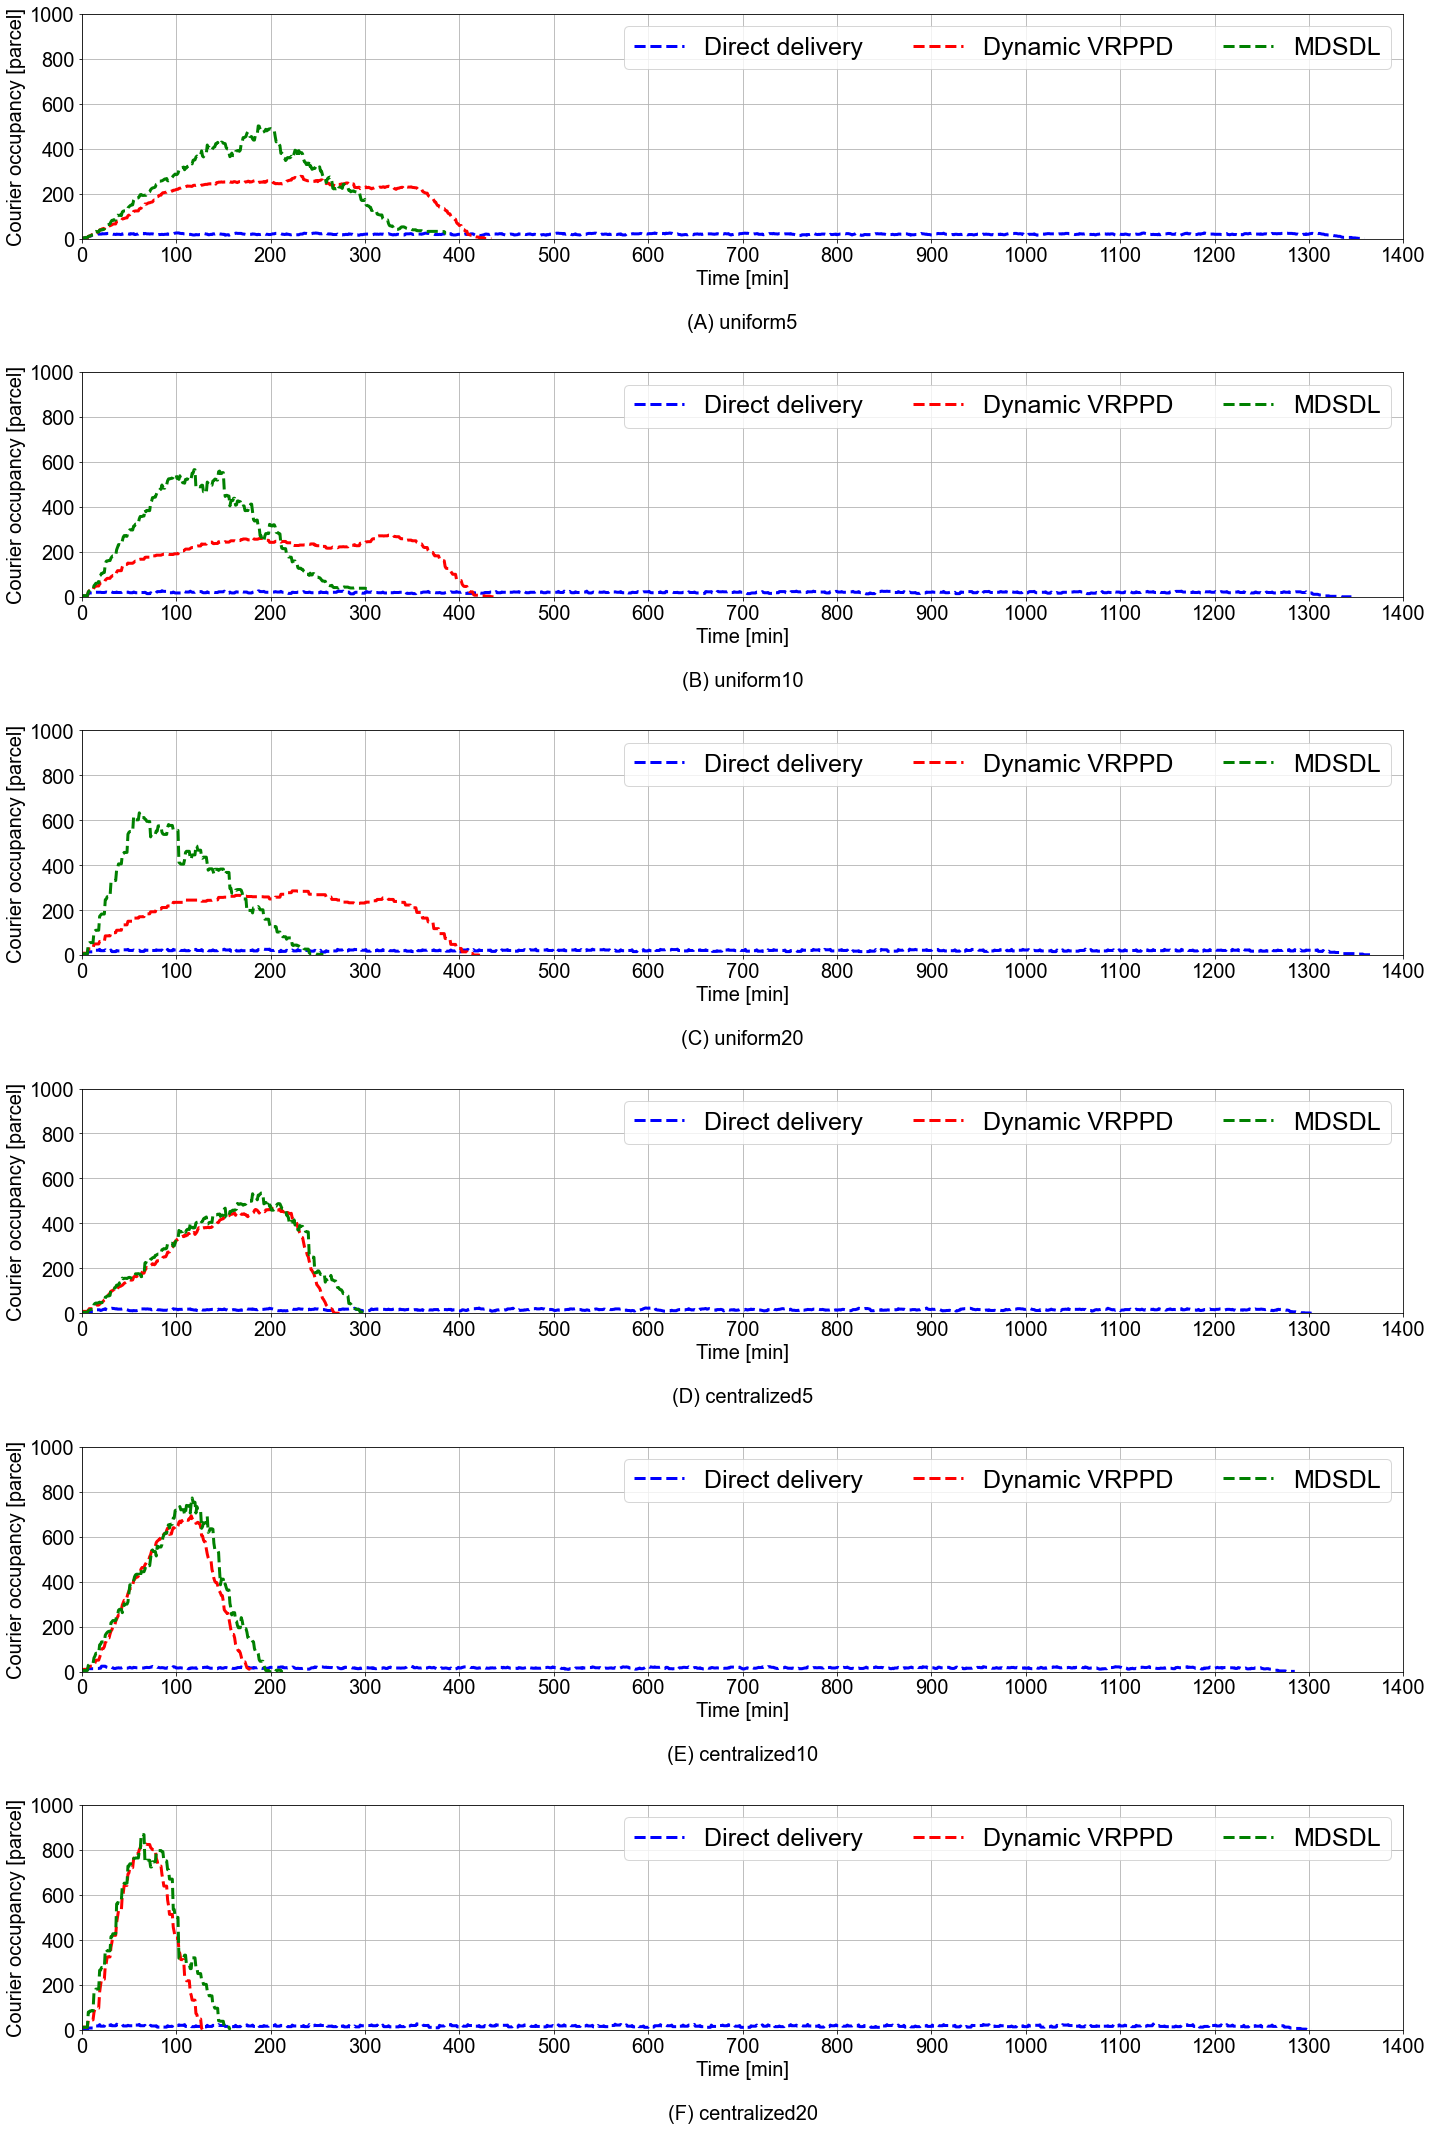

In [3]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/01Direct_Delivery/","./03result/02Dynamic_VRPPD/","./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################


Methods=["Direct delivery", "Dynamic VRPPD", "MDSDL"]

# save_paths=["./03result/01Direct_Delivery/","./03result/02Dynamic_VRPPD/"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(6,1,figsize=(20,30))

for i in range(6):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################


figure_idx=0

##########################################################################################
##########################################################################################


colors=['blue','red','green']


##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for pattern in patterns:

    ##########################################################################################
    ##########################################################################################

    for lambda_value in lambda_values:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            if i==0:

                for courier_id in parcel_df.courier_id.unique():
                    
                    sample_df=parcel_df.loc[parcel_df.courier_id==courier_id]
                    
                    Courier_occupancy[courier_id]={t:0 for t in range(1,int(sample_df.drop_off_time.max()),1)}
                    
                    for idx,row in sample_df.iterrows():
                        
                        for t in range(int(row.pick_up_time),int(row.drop_off_time)+1,1):
                            
                            Courier_occupancy[courier_id][t]=1

            else:
                
                ##########################################################################################

                courier_schedules=np.load(save_path+"/courier_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
                
                parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()
                
                ##########################################################################################
                
                Initial_courier_occupancy={}
                
                for courier_id in courier_schedules.keys():
                    
                    Initial_courier_occupancy[courier_id]={}
                    
                    schedule=courier_schedules[courier_id]
                    
                    time_lines=list(schedule.keys())
                    
                    schedule_events=[v[1] for v in list(schedule.values())]
                    
                    occupancy=0
                    
                    Initial_courier_occupancy[courier_id]={}
                    
                    for t,event in schedule.items():
                        
                        event=event[1]
                        
                        pick_ups=sum([1 for e in event if "pick_up" in e])
                        
                        drop_offs=sum([1 for e in event if "drop_off" in e])
                        
                        occupancy=occupancy+pick_ups-drop_offs
                        
                        Initial_courier_occupancy[courier_id][t]=occupancy
                        
                ##########################################################################################
            
                
                for courier_id,schedules in Initial_courier_occupancy.items():
    
                    stamps=list(schedules.keys())

                    occupancies=list(schedules.values())
            
                    courier_occupancy={}

                    for k in range(1,len(stamps),1):

                        courier_occupancy[stamps[k-1]]=occupancies[k-1]

                        pre_t,cur_t=stamps[k-1],stamps[k]
                        
                        for t in range(pre_t,cur_t,1):
                            
                            courier_occupancy[t]=occupancies[k-1]
                            
                    courier_occupancy[stamps[-1]]=occupancies[-1]
                            
                    courier_occupancy = dict(sorted(courier_occupancy.items()))
                    
                    Courier_occupancy[courier_id]=courier_occupancy
        
            ##########################################################################################
            ##########################################################################################
            
            occupancy_df=pd.DataFrame(Courier_occupancy)
            
            occupancy_df=occupancy_df.fillna(0)
            
            occupancy_df['sum_occupancy'] = occupancy_df.sum(axis=1)
            
            occupancy_df['t']=occupancy_df.index
            
            ##########################################################################################
            ##########################################################################################

            axs[figure_idx].plot(occupancy_df.t, occupancy_df.sum_occupancy,label=Methods[i],color=colors[i],linewidth=3,linestyle='--')
            
            ##########################################################################################
            ##########################################################################################

            axs[figure_idx].set_xlabel('Time [min]\n\n'+labels[figure_idx]+' '+instance_name+'\n',font_label)

            axs[figure_idx].set_ylabel("Courier occupancy [parcel]",font_label)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].legend(loc ='upper right',prop=font_legend,ncol=3)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].set_ylim([0,1000])
            
            axs[figure_idx].set_xlim([0,1400])
            
            xmajorLocator  = MultipleLocator(100)

            axs[figure_idx].xaxis.set_major_locator(xmajorLocator)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].grid()

        figure_idx+=1
        


##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/08courier_occupancy.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

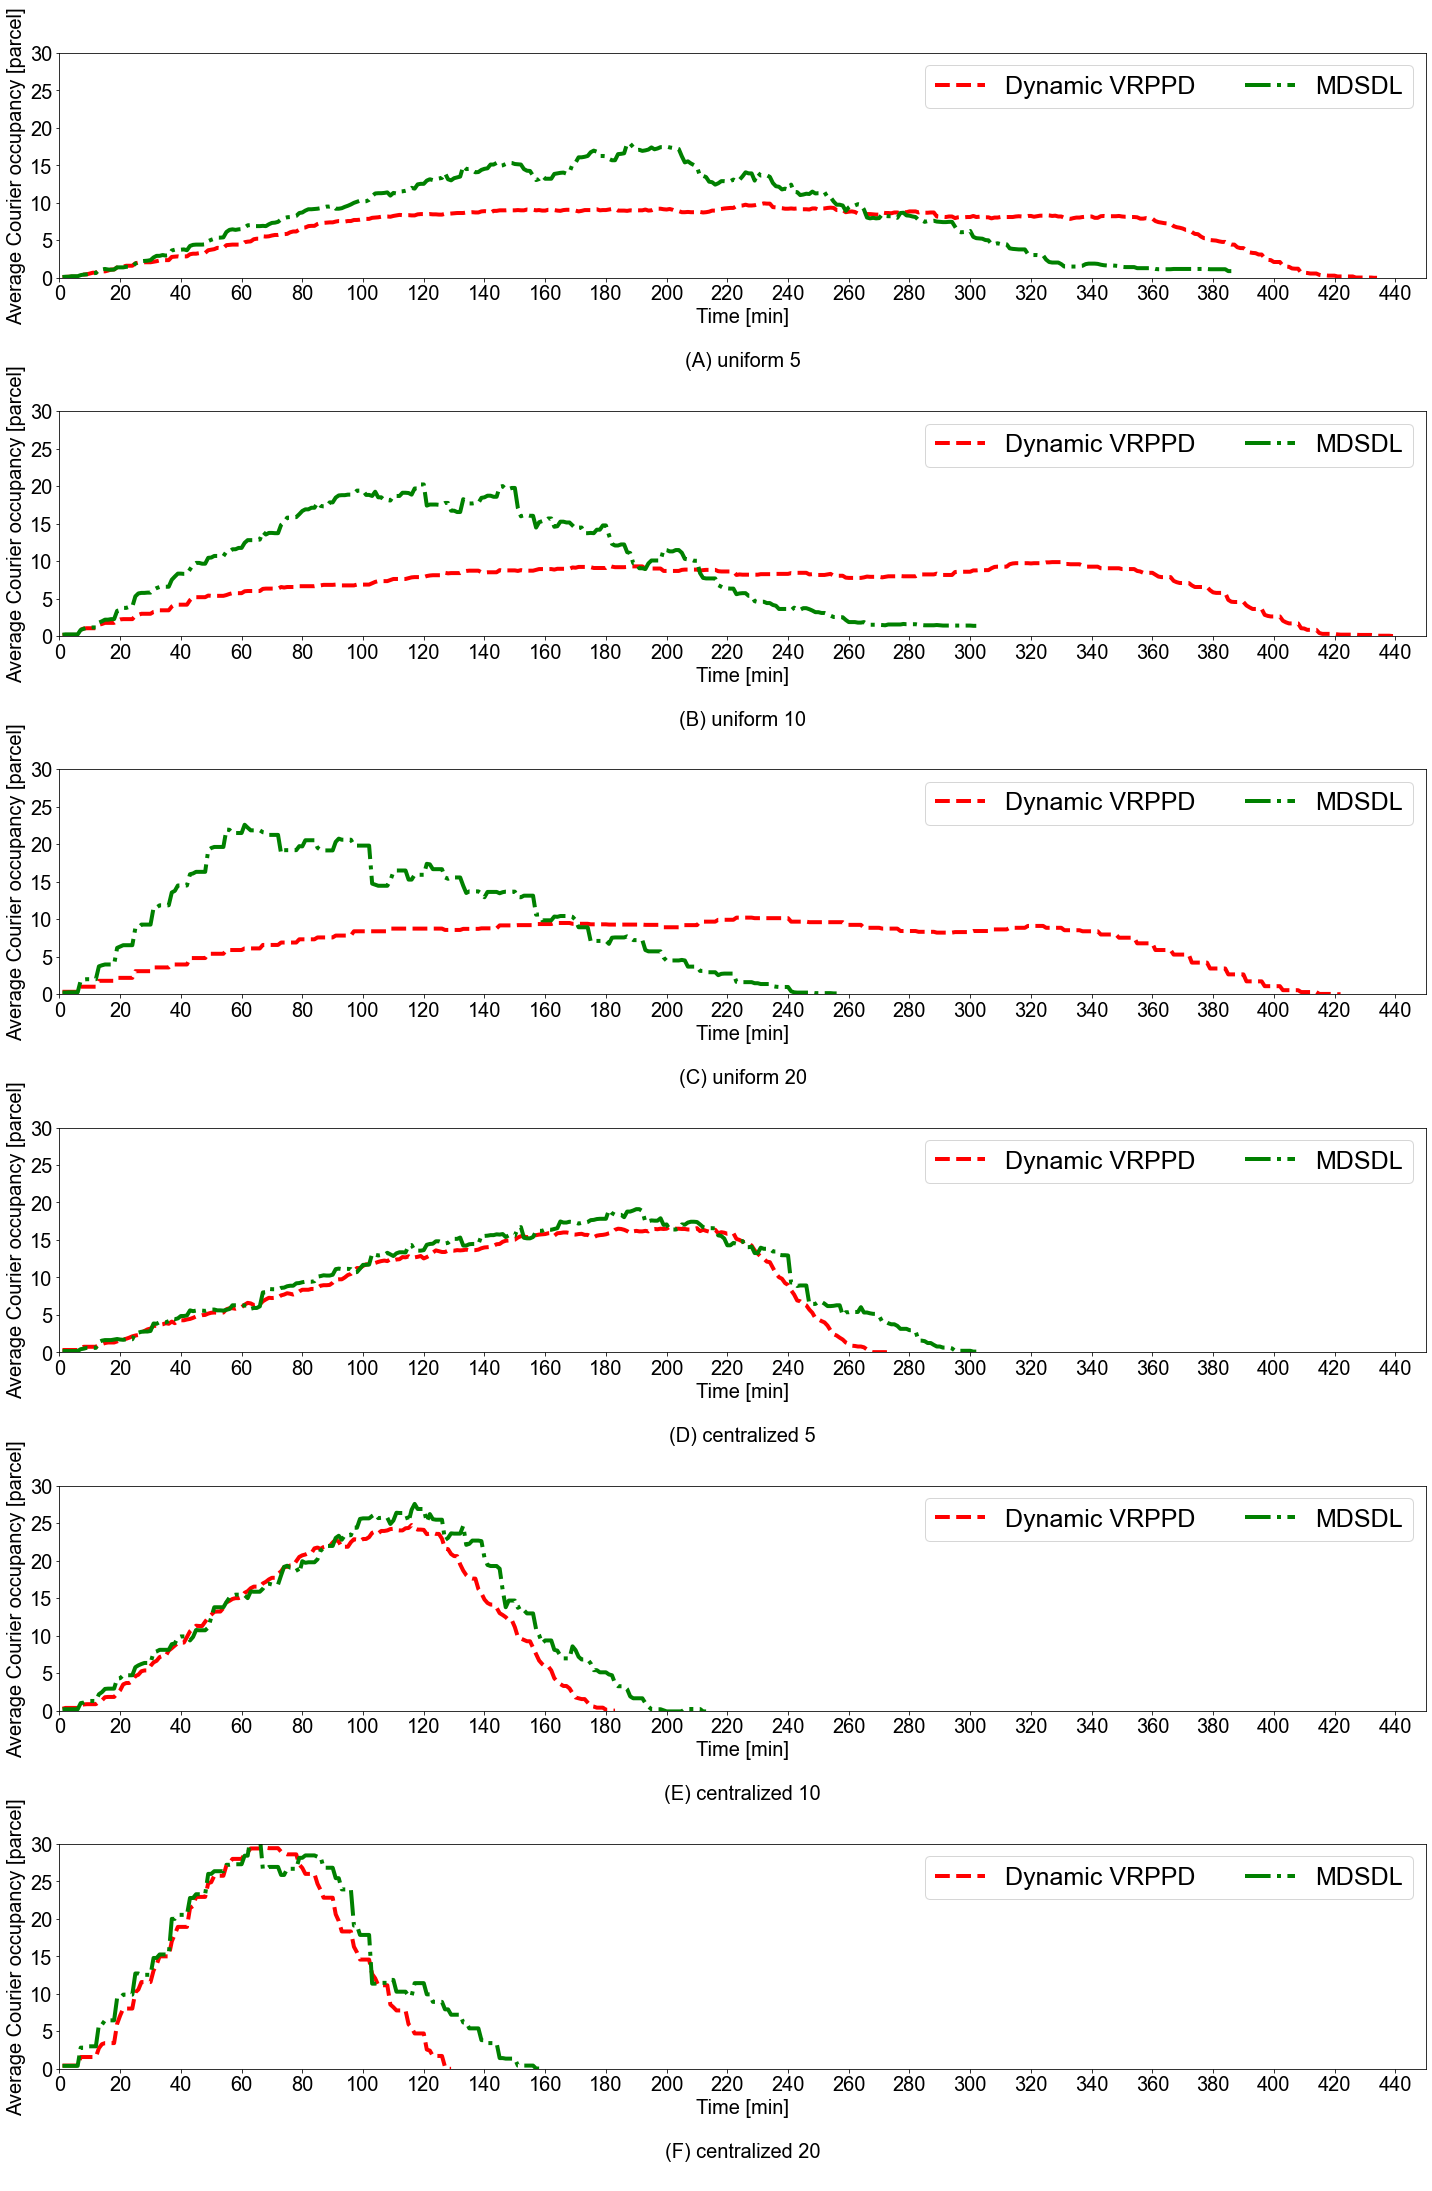

In [4]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/02Dynamic_VRPPD/","./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

Methods=["Dynamic VRPPD", "MDSDL"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(6,1,figsize=(20,30))

for i in range(6):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################


figure_idx=0

##########################################################################################
##########################################################################################

colors=['red','green']

linestyles=['--','-.']

markers=['x','+']


##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for pattern in patterns:

    ##########################################################################################
    ##########################################################################################

    for lambda_value in lambda_values:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+" "+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################


            courier_schedules=np.load(save_path+"/courier_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

            ##########################################################################################

            Initial_courier_occupancy={}

            for courier_id in courier_schedules.keys():

                Initial_courier_occupancy[courier_id]={}

                schedule=courier_schedules[courier_id]

                time_lines=list(schedule.keys())

                schedule_events=[v[1] for v in list(schedule.values())]

                occupancy=0

                Initial_courier_occupancy[courier_id]={}

                for t,event in schedule.items():

                    event=event[1]

                    pick_ups=sum([1 for e in event if "pick_up" in e])

                    drop_offs=sum([1 for e in event if "drop_off" in e])

                    occupancy=occupancy+pick_ups-drop_offs

                    Initial_courier_occupancy[courier_id][t]=occupancy

            ##########################################################################################


            for courier_id,schedules in Initial_courier_occupancy.items():

                stamps=list(schedules.keys())

                occupancies=list(schedules.values())

                courier_occupancy={}

                for k in range(1,len(stamps),1):

                    courier_occupancy[stamps[k-1]]=occupancies[k-1]

                    pre_t,cur_t=stamps[k-1],stamps[k]

                    for t in range(pre_t,cur_t,1):

                        courier_occupancy[t]=occupancies[k-1]

                courier_occupancy[stamps[-1]]=occupancies[-1]

                courier_occupancy = dict(sorted(courier_occupancy.items()))

                Courier_occupancy[courier_id]=courier_occupancy
        
            ##########################################################################################
            ##########################################################################################
            
            occupancy_df=pd.DataFrame(Courier_occupancy)
            
            occupancy_df=occupancy_df.fillna(0)
            
            occupancy_df['sum_occupancy'] = occupancy_df.mean(axis=1)
            
            occupancy_df['t']=occupancy_df.index
            
            ##########################################################################################
            ##########################################################################################

            axs[figure_idx].plot(occupancy_df.t, occupancy_df.sum_occupancy,label=Methods[i],color=colors[i],linewidth=4,linestyle=linestyles[i])
            
            ##########################################################################################
            ##########################################################################################

            axs[figure_idx].set_xlabel('Time [min]\n\n'+labels[figure_idx]+' '+instance_name+'\n',font_label)

            axs[figure_idx].set_ylabel("Average Courier occupancy [parcel]",font_label)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].legend(loc ='upper right',prop=font_legend,ncol=3)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].set_ylim([0,30])
            
            axs[figure_idx].set_xlim([0,450])
            
            xmajorLocator  = MultipleLocator(20)

            axs[figure_idx].xaxis.set_major_locator(xmajorLocator)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].grid()

        figure_idx+=1
        


##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/08courier_occupancy.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()



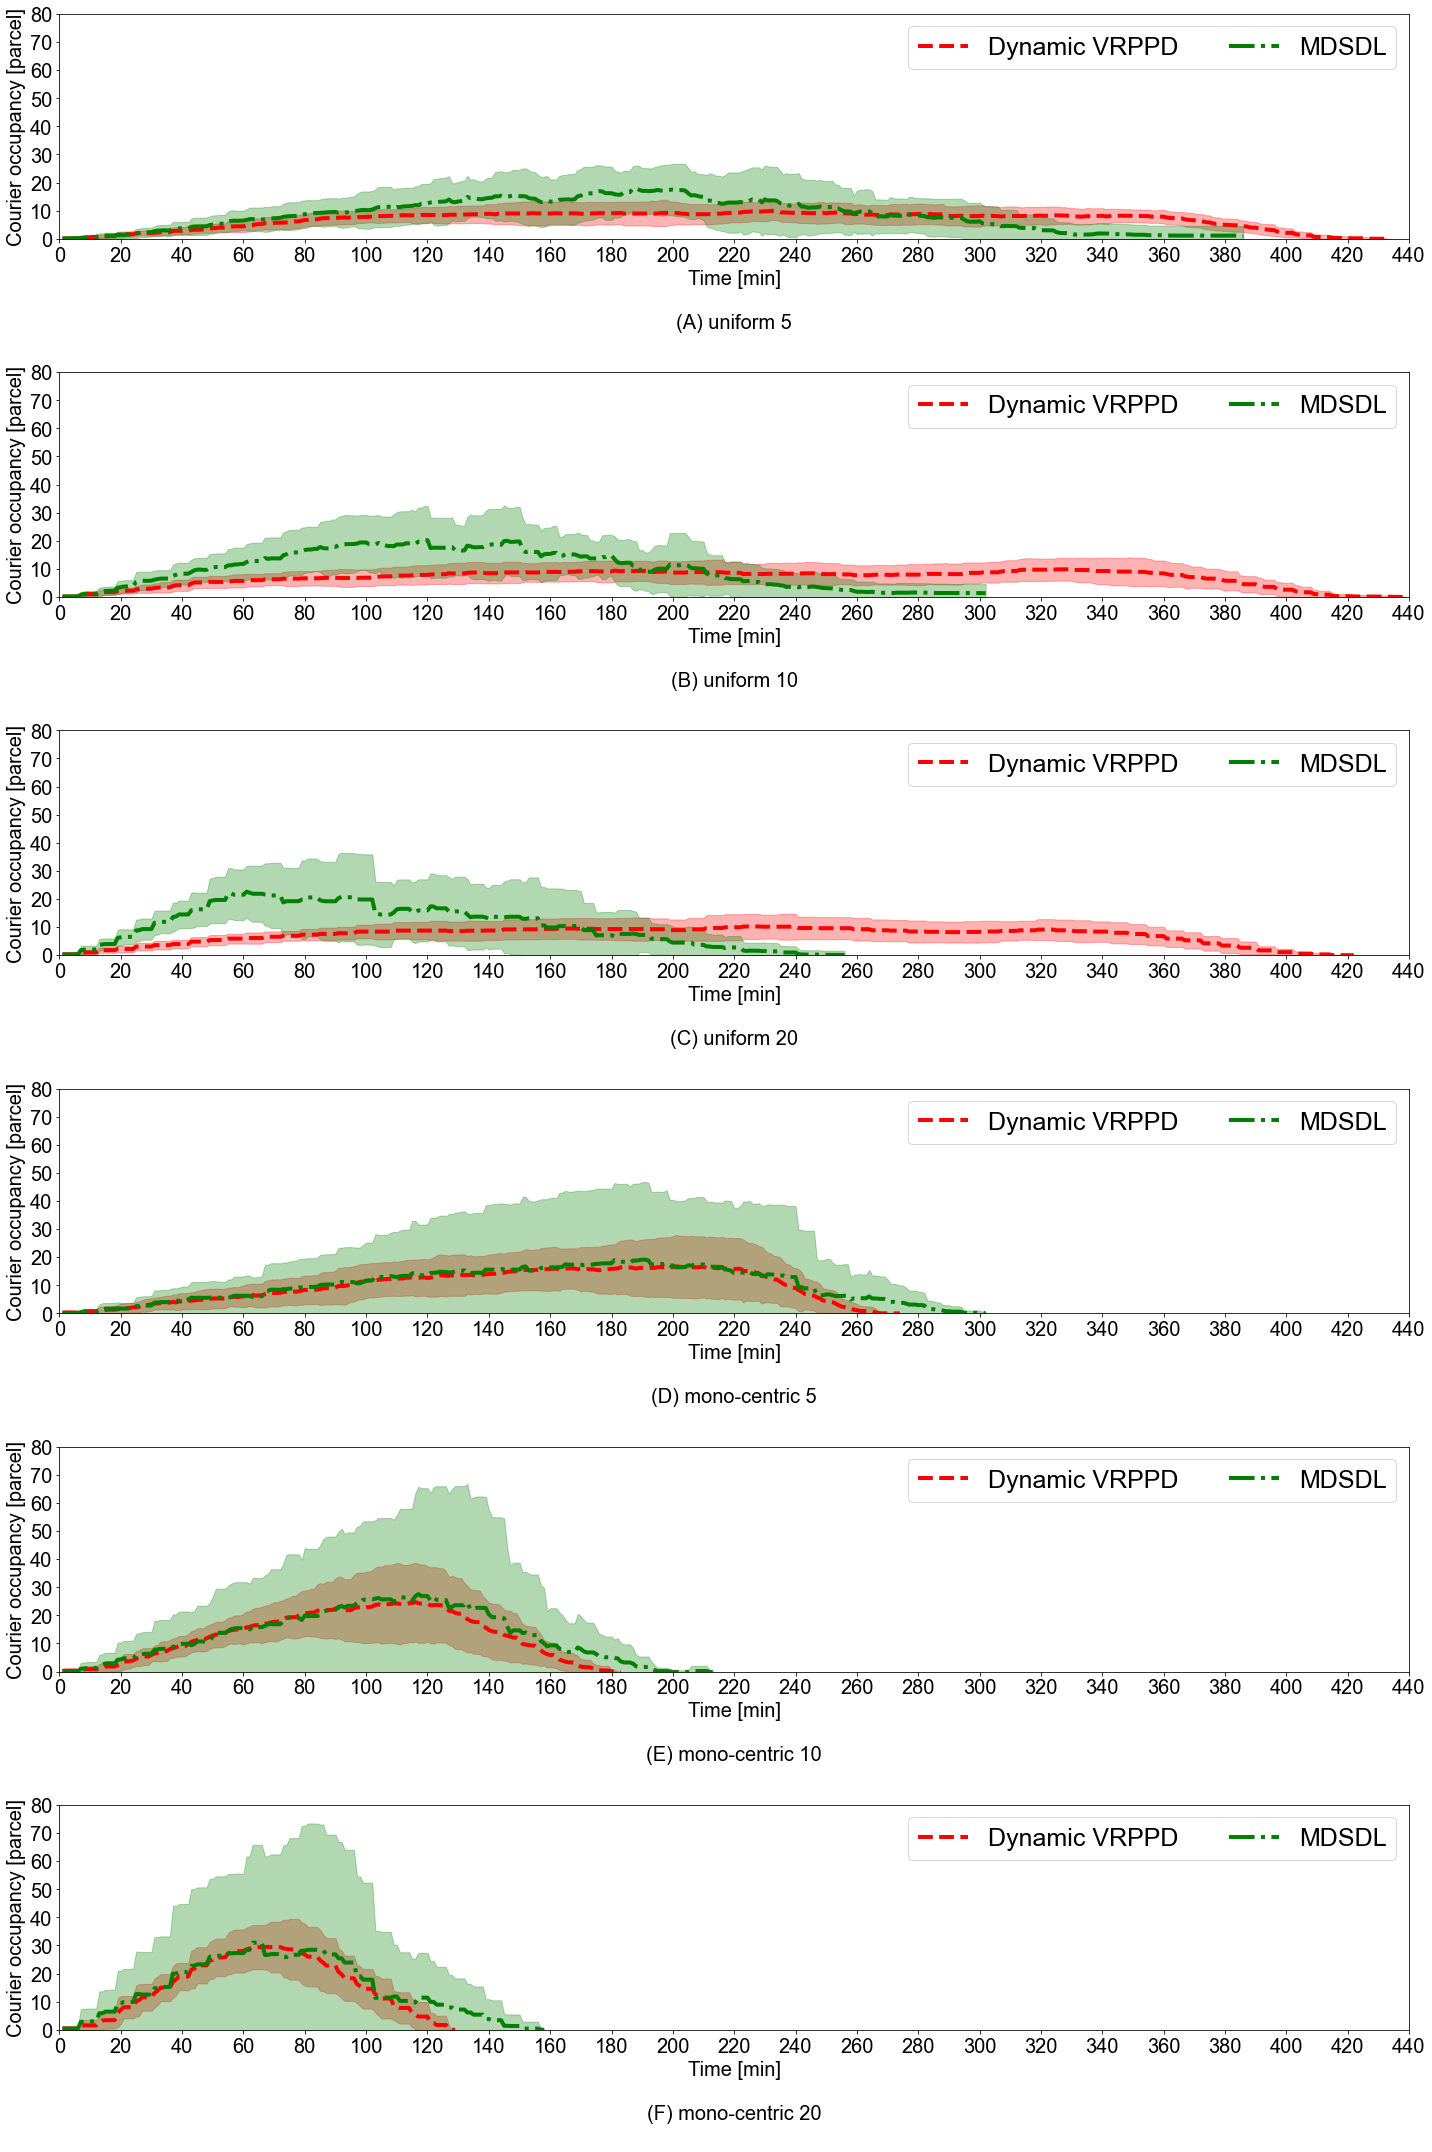

In [6]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/02Dynamic_VRPPD/","./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

Methods=["Dynamic VRPPD", "MDSDL"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(6,1,figsize=(20,30))

for i in range(6):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################


figure_idx=0

##########################################################################################
##########################################################################################

colors=['red','green']

linestyles=['--','-.']

markers=['x','+']

new_linestyles=['-','-']

##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for pattern in patterns:

    ##########################################################################################
    ##########################################################################################

    for lambda_value in lambda_values:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+" "+str(lambda_value)
        
        if 'centralized' in instance_name:
            
            instance_name='mono-centric'+" "+str(lambda_value)
            
#         twin_axs =  axs[figure_idx].twinx()
        
#         tick_labels = twin_axs.get_xticklabels() + twin_axs.get_yticklabels()

#         [label.set_fontsize(20) for label in tick_labels]

#         [label.set_fontname('Arial') for label in tick_labels]

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            courier_schedules=np.load(save_path+"/courier_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

            ##########################################################################################

            Initial_courier_occupancy={}

            for courier_id in courier_schedules.keys():

                Initial_courier_occupancy[courier_id]={}

                schedule=courier_schedules[courier_id]

                time_lines=list(schedule.keys())

                schedule_events=[v[1] for v in list(schedule.values())]

                occupancy=0

                Initial_courier_occupancy[courier_id]={}

                for t,event in schedule.items():

                    event=event[1]

                    pick_ups=sum([1 for e in event if "pick_up" in e])

                    drop_offs=sum([1 for e in event if "drop_off" in e])

                    occupancy=occupancy+pick_ups-drop_offs

                    Initial_courier_occupancy[courier_id][t]=occupancy

            ##########################################################################################


            for courier_id,schedules in Initial_courier_occupancy.items():

                stamps=list(schedules.keys())

                occupancies=list(schedules.values())

                courier_occupancy={}

                for k in range(1,len(stamps),1):

                    courier_occupancy[stamps[k-1]]=occupancies[k-1]

                    pre_t,cur_t=stamps[k-1],stamps[k]

                    for t in range(pre_t,cur_t,1):

                        courier_occupancy[t]=occupancies[k-1]

                courier_occupancy[stamps[-1]]=occupancies[-1]

                courier_occupancy = dict(sorted(courier_occupancy.items()))

                Courier_occupancy[courier_id]=courier_occupancy
        
            ##########################################################################################
            ##########################################################################################
            
            occupancy_df=pd.DataFrame(Courier_occupancy)
            
            occupancy_df=occupancy_df.fillna(0)
            
            occupancy_df['mean_occupancy'] = occupancy_df[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11',
                                                            'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21',
                                                            'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28']].mean(axis=1)
            
            occupancy_df['std_occupancy'] = occupancy_df[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11',
                                                            'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21',
                                                            'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28']].std(axis=1)
            
            occupancy_df['mean_plus_std'] = occupancy_df.mean_occupancy+occupancy_df.std_occupancy
            
            occupancy_df['mean_minus_occupancy'] = occupancy_df.mean_occupancy-occupancy_df.std_occupancy
            
            occupancy_df['max_occupancy']=occupancy_df[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11',
                                                            'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21',
                                                            'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28']].max(axis=1)
            
            occupancy_df['t']=occupancy_df.index
            
            ##########################################################################################
            ##########################################################################################

            axs[figure_idx].plot(occupancy_df.t, occupancy_df.mean_occupancy,label=Methods[i],color=colors[i],linewidth=4,linestyle=linestyles[i])
            
            axs[figure_idx].fill_between(occupancy_df.t, occupancy_df.mean_plus_std,occupancy_df.mean_minus_occupancy, color=colors[i], alpha=0.3)
            
    
            ##########################################################################################
            ##########################################################################################

            axs[figure_idx].set_xlabel('Time [min]\n\n'+labels[figure_idx]+' '+instance_name+'\n',font_label)

            axs[figure_idx].set_ylabel("Courier occupancy [parcel]",font_label)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].legend(loc ='upper right',prop=font_legend,ncol=3)
            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].set_ylim([0,80])
            
            axs[figure_idx].set_xlim([0,440])
            
            xmajorLocator  = MultipleLocator(20)

            axs[figure_idx].xaxis.set_major_locator(xmajorLocator)
            
            ##########################################################################################
            ##########################################################################################
            
            
#             axs[figure_idx].plot(occupancy_df.t, occupancy_df.max_occupancy,color=colors[i],linewidth=6,linestyle=new_linestyles[i])
            
#             twin_axs.set_ylabel("Maximum occupancy [parcel]",font_label)

            
            ##########################################################################################
            ##########################################################################################
            
            axs[figure_idx].grid()

        figure_idx+=1
        


##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/08courier_occupancy.png')

# current_fig.savefig('./07figures/08courier_occupancy.eps', format='eps', dpi=1000)

# current_fig.savefig('./07figures/08courier_occupancy.svg', format='svg', dpi=1000, bbox_inches = 'tight')

# plt.savefig("filename.svg", format="svg",transparent=True)

plt.show()

